In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/creole-5/cgen4.csv
/kaggle/input/creolelanguage/cgen3-ds.csv
/kaggle/input/creole/cgen3-ds.csv


**THIS MODEL IS TRAINED TO IDENTIFY SOME OF THE MOST WIDELY USED CREOLE LANGUAGES SUCH AS TOK PISIN, PAPIAMENTO, JAMAICAN PATOIS, HAITIAN CREOLE AND CAPE VERDEAN CREOLE. FOR THE SCOPE OF THIS NLP PROJECT, I ONLY USED THOSE FIVE CREOLES. THIS MODEL CAN BE TRAINED WITH ALL CREOLES KNOWN TO MANKIND. THIS NLP IS TRAINED USING A DATASET THAT I CREATED USING AN ALGORITHM. ENJOY !!!**

                                                Text             Language
0  Moses spend forty years leading di people dem ...      Jamaican Creole
1          Bilong me hangamapim bot stap pulap maleo            Tok Pisin
2  Papa Bubu, di Banda Bou, tabata manera un tawe...           Papiamento
3                        E meneer lo paga pa tur cos           Papiamento
4  Di way shi talk wid di children, an nuh tap we...      Jamaican Creole
5  Pogivim rong bilong mipela olsem mipela i pogi...            Tok Pisin
6                      Modi bu sta?, Kuma ku bu sta?  Cape Verdean Creole
7  papelnan ofisial mi a ripará ku el a nase na 1...           Papiamento
8  Venezuela i a traha den Kòkou. Ta di dje mi a ...           Papiamento
9   Tasol olsem histori bilong ol kampani olsem F...            Tok Pisin
Language
Jamaican Creole        2000
Tok Pisin              2000
Papiamento             2000
Cape Verdean Creole    2000
Haitian Creole         2000
Name: count, dtype: int64
[2 4 3 ... 

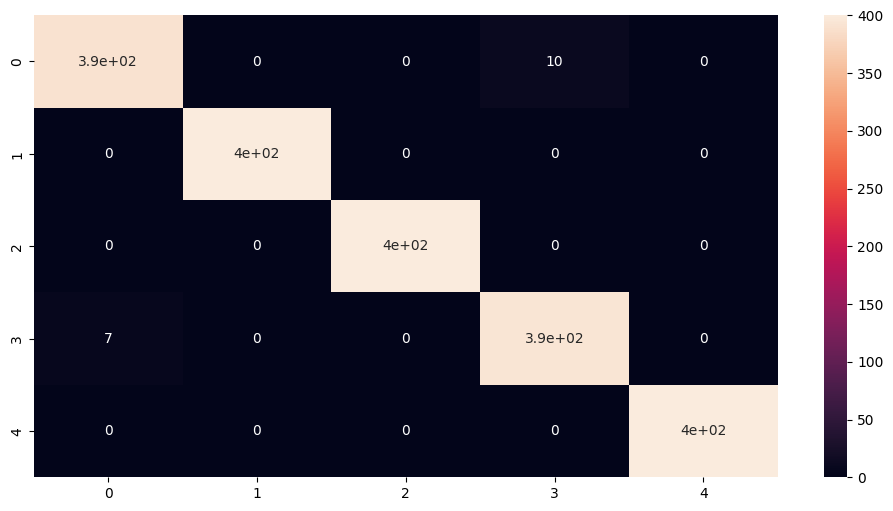

THE ACCURACY OF THE MODEL IS: 0.9915


In [2]:
import pandas as pd
import numpy as np
import re 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.naive_bayes import MultinomialNB

warnings.simplefilter("ignore")

df = pd.read_csv("/kaggle/input/creole-5/cgen4.csv")
print(df.head(10))
print(df['Language'].value_counts())


X = df['Text']
y = df['Language']

#initiate label encoder 

le = LabelEncoder()
y = le.fit_transform(y)
print(y)


#Text pre processing removing unwanted symbols
#create a list for appending the preprocessed text
data_list = []
for text in X:
	text = re.sub(r'[!@#$(),"%^*?:;~`0-9]', ' ', text)
	text = re.sub(r'[[]]', ' ', text)
	text = text.lower()
	data_list.append(text)

#Bag of words - converting text into numerical form by creating bag of words using count vectorizer 


cv = CountVectorizer()
X = cv.fit_transform(data_list).toarray()
print(X.shape)

#Train test split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=42)


model = MultinomialNB()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

ac = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
cl = classification_report(y_test,y_pred)


print("confusion_matrix is:", cm)
print("Classification report is:", cl)

#Plot theheatmap

plt.figure(figsize=(12,6))
sns.heatmap(cm, annot=True)
plt.show()

print("THE ACCURACY OF THE MODEL IS:", ac)


def predict(text):
    # Check if the sentence is too short
    if len(text.split()) < 3:  # Adjust the length threshold as needed
        return "please enter a longer sentence"
    
    # Transform the text to vector form
    x = cv.transform([text]).toarray()
    
    # Predict the language and get the probability of prediction
    lang_prob = model.predict_proba(x)
    
    # Find the index of the highest probability
    max_prob_index = np.argmax(lang_prob)
    
    # Set a confidence threshold (e.g., 0.5 or 50%)
    confidence_threshold = 0.80
    
    if lang_prob[0][max_prob_index] < confidence_threshold:
        return "Not certain, please enter a longer sentence or rephrase"
    
    # Predict the language if confidence is high enough
    lang = model.predict(x)
    lang = le.inverse_transform(lang)
    
    return f"The Language is likely {lang[0]}"

In [3]:
predict('Ale nan boutik la epi kòmande mwen kèk farin, diri, farin mayi ak sik kounye a pou m kwit. Mwen ap mouri grangou')


'The Language is likely Haitian Creole'

In [4]:
predict('Bai na e tienda i pidi mi un tiki hariña, aros, hariña di maishi i suku awor aki mes pa kushiná. Mi ta muriendo di hamber')


'The Language is likely Papiamento'

In [5]:
predict('Go long stua na odarim mi sampela plaua, rais, kon na suga nau yet long kukim. Mi hangre')


'The Language is likely Tok Pisin'

In [7]:
predict('Yo bredda mek mi an yuh go a di market fi yam an banana')


'The Language is likely Jamaican Creole'

In [9]:
predict('Bon dia, Kuma ku bu nome? N’ka ta papia kriol')


'The Language is likely Cape Verdean Creole'

In [8]:
predict('Wa happen tuh yuh')

'The Language is likely Jamaican Creole'

In [ ]:
pre